In [9]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lec6_graphs as afx
import seaborn as sns

warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (20,20)
plt.style.use('seaborn')

In [4]:
df = pd.read_csv('diabetes.csv').drop('Unnamed: 0',axis=1)

In [5]:
df.head()

,class,glucose,insulin,sspg
0,Normal,80,356,124
1,Normal,97,289,117
2,Normal,105,319,143
3,Normal,90,356,199
4,Normal,90,323,240


In [6]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report

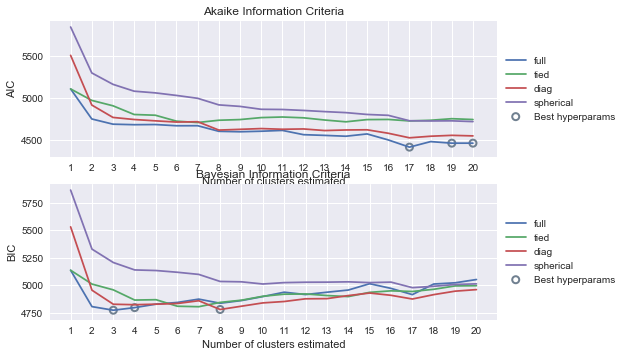

In [10]:
afx.gmm_information_criteria_report(df.loc[:,'glucose':'sspg'], k=np.arange(1,21))

In [11]:
x_mat = df.loc[:,'glucose':'sspg']
X = StandardScaler().fit_transform(x_mat)
df['y'] = LabelEncoder().fit_transform(df['class'])
X_train , X_test, y_train , y_test  = train_test_split(x_mat,df['y'], random_state = 11238,test_size=0.33)

In [12]:
gmm = GaussianMixture(n_components=3,covariance_type='full',random_state=323).fit(X_train)

In [13]:
predict_classes_gmm = gmm.predict(X_test)
print(classification_report(y_test,predict_classes_gmm))

              precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       0.69      1.00      0.81        24
           2       1.00      0.91      0.95        11

    accuracy                           0.77        48
   macro avg       0.90      0.71      0.71        48
weighted avg       0.84      0.77      0.73        48



In [14]:
for i , n in enumerate(df['class'].unique()):
    print("Ponderador para la clase {}: {}".format(i,gmm.weights_[i]))
    for j,k in enumerate(x_mat.columns):
        print("Media {}: {}".format(k,gmm.means_[i][j]))
        print("Covarianza {}: {}".format(k,gmm.covariances_[i][j]))
    print('\n',50*'=','\n')
        

Ponderador para la clase 0: 0.06586517006748531
Media glucose: 105.54170382989922
Covarianza glucose: [100.26897676 442.06484176  77.49088075]
Media insulin: 500.31443784162843
Covarianza insulin: [ 442.06484176 3379.994771   2748.59545605]
Media sspg: 553.5963541078603
Covarianza sspg: [   77.49088075  2748.59545605 12920.54072993]


Ponderador para la clase 1: 0.7446123260775241
Media glucose: 94.65877758969272
Covarianza glucose: [ 145.36214155 1030.62093116  -80.37136919]
Media insulin: 395.8184949029248
Covarianza insulin: [ 1030.62093116 12125.72347305   259.32470541]
Media sspg: 181.49538559323653
Covarianza sspg: [ -80.37136919  259.32470541 5324.64643257]


Ponderador para la clase 2: 0.18952250385499034
Media glucose: 225.457836129145
Covarianza glucose: [ 5551.79432201 20721.82134318 -2440.60057109]
Media insulin: 1072.0698044759647
Covarianza insulin: [20721.82134318 84466.95339276 -9576.84361164]
Media sspg: 75.72896803119646
Covarianza sspg: [-2440.60057109 -9576.84361164

In [15]:
print("Densidades de clase inferida: ", gmm.weights_.round(3))

Densidades de clase inferida:  [0.066 0.745 0.19 ]
